# **CHAPTER 2: END-TO-END MACHINE LEARNING PROJECT**

**1. Look at the big picture.**<br>
**2. Get the data.**<br>
**3. Discover and visualize the data to gain insights.**<br>
**4. Prepare the data for machine learning algorithms.**<br>
**5. Select a model and train it.**<br>
**6. Fine-tune your model.**<br>
**7. Present your solution.**<br>
**8. Launch, monitor and maintain your system.**<br>

## **California Housing Prices dataset from the statLib repository.**
This dataset was based on data from the 1990 California census.

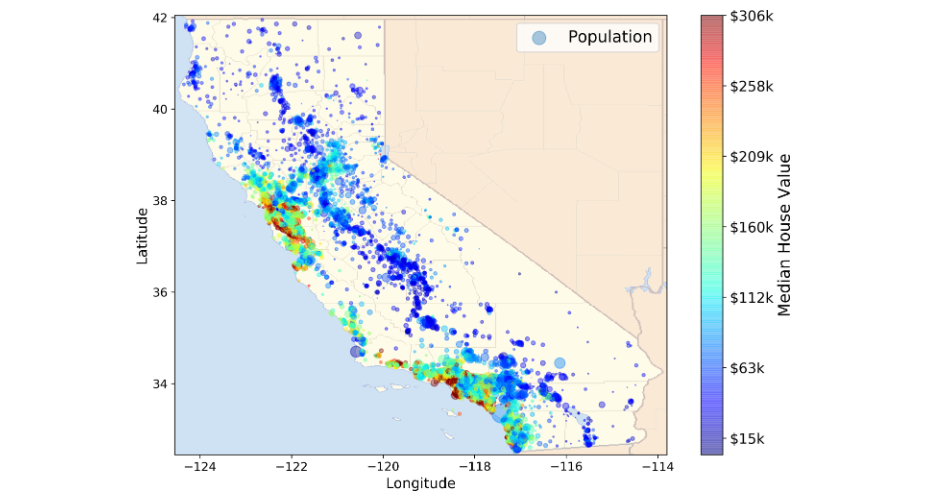

The data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data. A block group typically has a population of 600 to 3000 people). We will just call them 'districts' for short.<br>
    Your model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

**A Machine Learning pipeline for real estate investments**

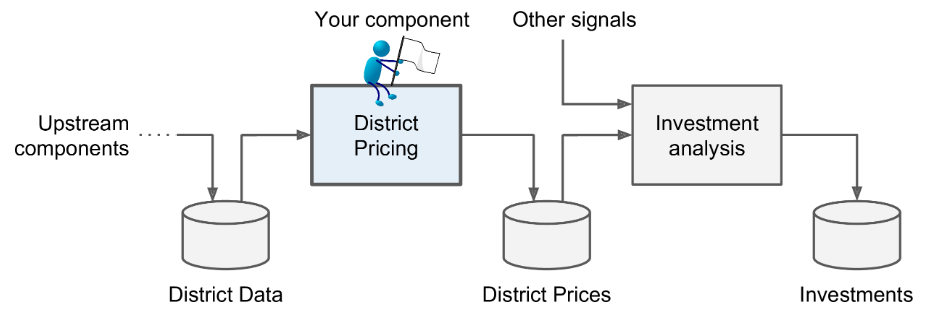

A Sequence of data processing components is called a data *pipeline*.<br>
A piece of information fed to a machine learning system is often called a *signal* in reference to Shannon's information theory. You want a high signal/noise ratio.

This is: 
- A supervised learning task.
- A multiple univariate regression problem.
- A plain batch learning task.

## **Select a Performance Measure**

A typical performance measure for regression problem is the Root Mean Square Error (RMSE).

$RMSE(X,h) =\large \sqrt{\frac{1}{m}\displaystyle \sum_{i=1} ^{m}(h(X^{(i)})-y^{(i)})^2}$

- $m$ is the number of instances in the dataset you are measuring the RMSE on. 
    - For example, if you are evaluating the RMSE on a validation set of 2000 districts, then m= 2000.
    
    
- $x^{(i)}$ is a vector of all the feature values (excluding the label) of the $i^{th}$ instance in the dataset, and $y^{i}$ is its label (the desired output value for that instance).
    - For example, if the first district in the dataset is located at longitude $-118.29^o$, latitude $33.91^o$, and it has 1416 inhabitant with a median income of 38372 dollars, and the median house value is $156,400 (ignoring the other features for now), then:
    
    - $x^{(1)}$ = $(-118.29, 33.91, 1416, 38372)^{T}$ and $y^{(1)} = 156,400$



- *h* is your system's prediction fucntion, also called a *hypothesis*. For example if your system predicts that the median housing price in the first district is 158,400 dollars, then $\hat{y} = h(X^{(1)})$ = 158,400. The prediction error for this district is $\hat{y}^{(1)} - y^{(1)}$ = 2000.



- RMSE(X,*h*) is the cost function measured on the set of examples using your hypothesis h.

Suppose that there are many outlier districts. In that case you may consider using the Mean Absolute Error (also called the Average Absolute Deviation)

$MAE(X,h) = \large \frac{1}{m} \displaystyle \sum_{i = 1} ^{m}|h(x^{(i)}) - y^{(i)}|$

## **A function to fetch the data**

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

## **Loading the data**

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
housing_original = load_housing_data()
housing_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing = housing_original.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


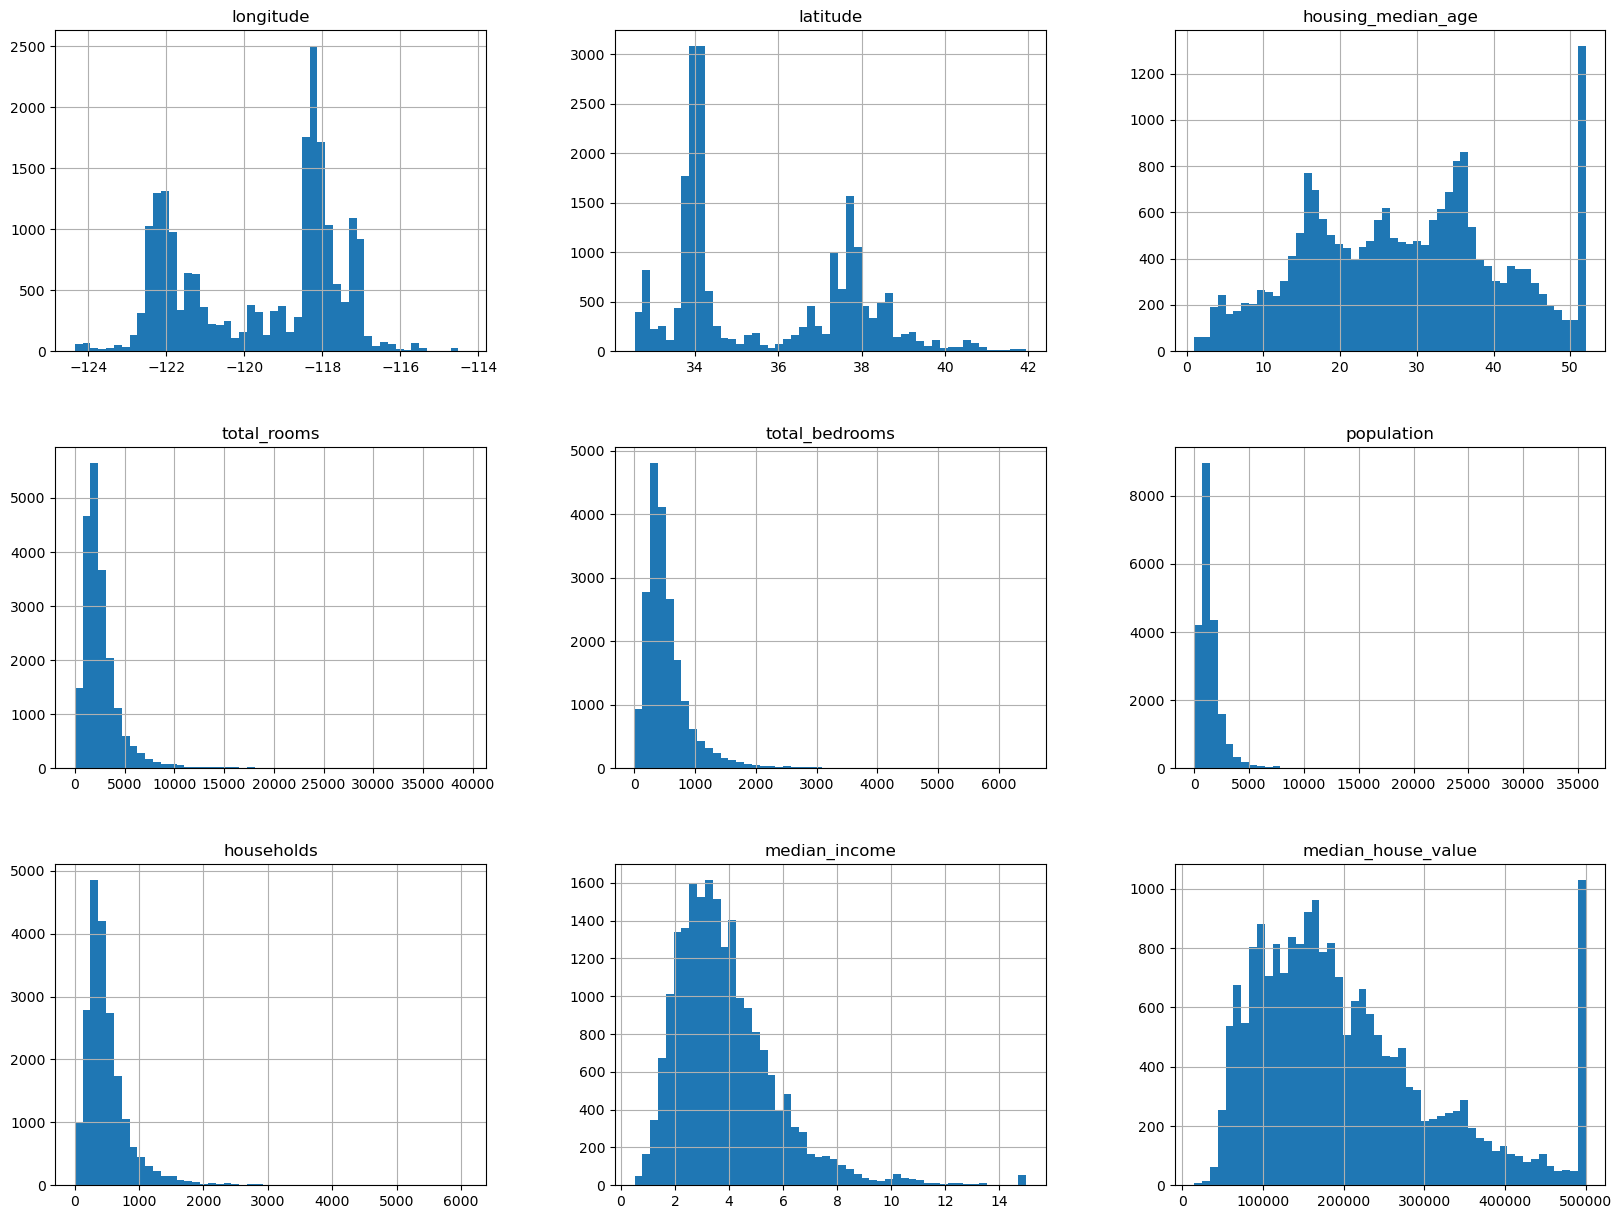

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
housing.hist(bins = 50, figsize = (20,15))
plt.show()

## **Spliting the data into train and test test**

**What is data snooping bias?**<br>
- When you esitimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print('Train set size: {}'.format(len(train_set)))
print('Test_set_size: {}'.format(len(test_set)))

Train set size: 16512
Test_set_size: 4128


The above method works, but it is not perfect. Read page 55 of the text book for explanation.<br>
An alternate solution is given by sklearn's model selection sub library.

**Notes**:
- Significant sampling bias
- Stratified sampling

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [13]:
print('Train set size: {}'.format(len(train_set)))
print('Test_set_size: {}'.format(len(test_set)))

Train set size: 16512
Test_set_size: 4128


**Stratified Sampling**

<AxesSubplot:>

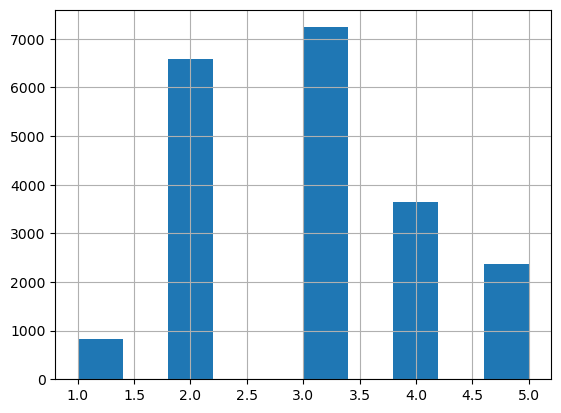

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0.,1.5,3.0,4.5,6.0, np.inf],
                               labels = [1,2,3,4,5])

housing['income_cat'].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2, random_state =42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Removing the income_cat attribute so the data is back to it original state.

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace = True)

Use StratifiedShuffleSplit when sample size is not big (relative to the number of features).

## **Discover and Visualize the Data to Gain Insights**

In [18]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


### **Visualizing Geographical Data**

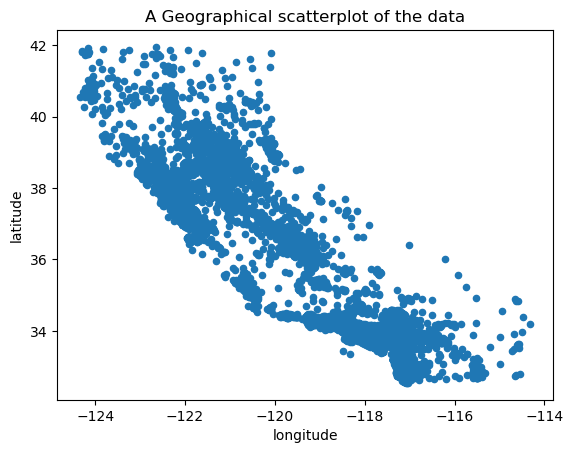

In [19]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
plt.title('A Geographical scatterplot of the data')
plt.show()

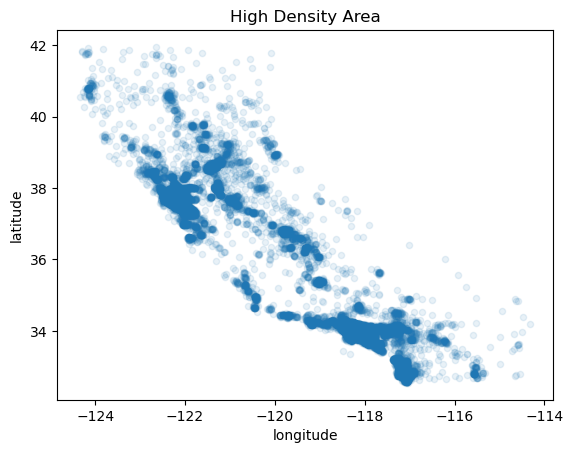

In [20]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.title('High Density Area')
plt.show()

High-density Areas, namely the **Bay Area** and around **Los Angeles** and **San Diego**, plus a long line of fairly high density in the **Central Valley**, in particular around **Sacramento** and **Fresno**.

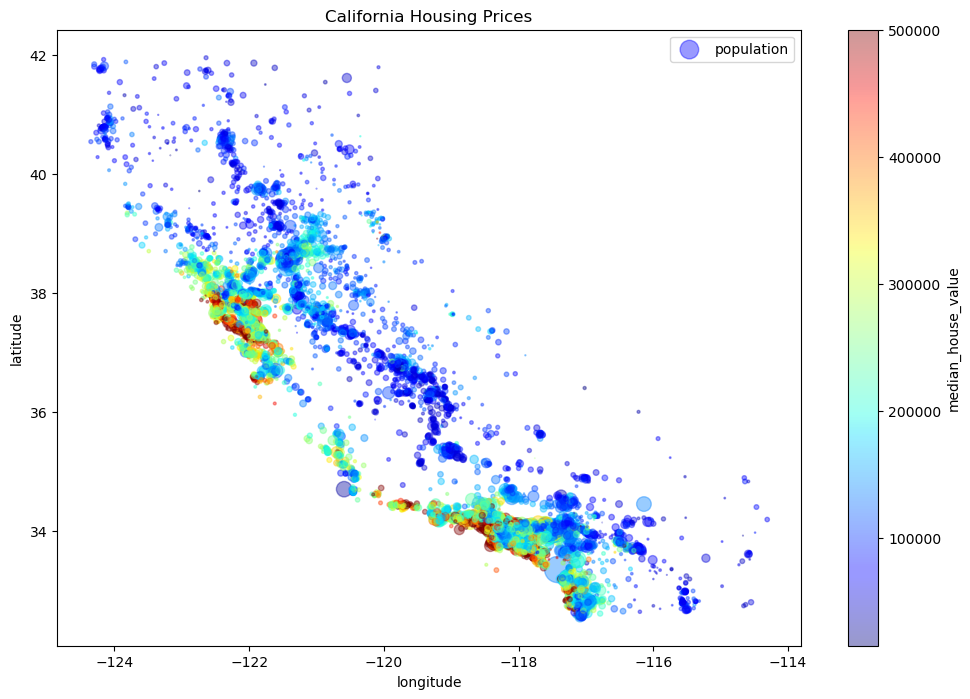

In [21]:
housing.plot(kind = 'scatter',x = 'longitude', y = 'latitude', alpha = 0.4, 
             s = housing['population']/100, label = 'population', figsize = (12,8),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
            )
plt.legend()
plt.title('California Housing Prices')
plt.show()

### **Looking for Correlations**

Computing the ***standard correlation coefficient (Pearson's r)*** between every pair of attributes using the corr() method:

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use Pandas' `scatter_matrix` function. 

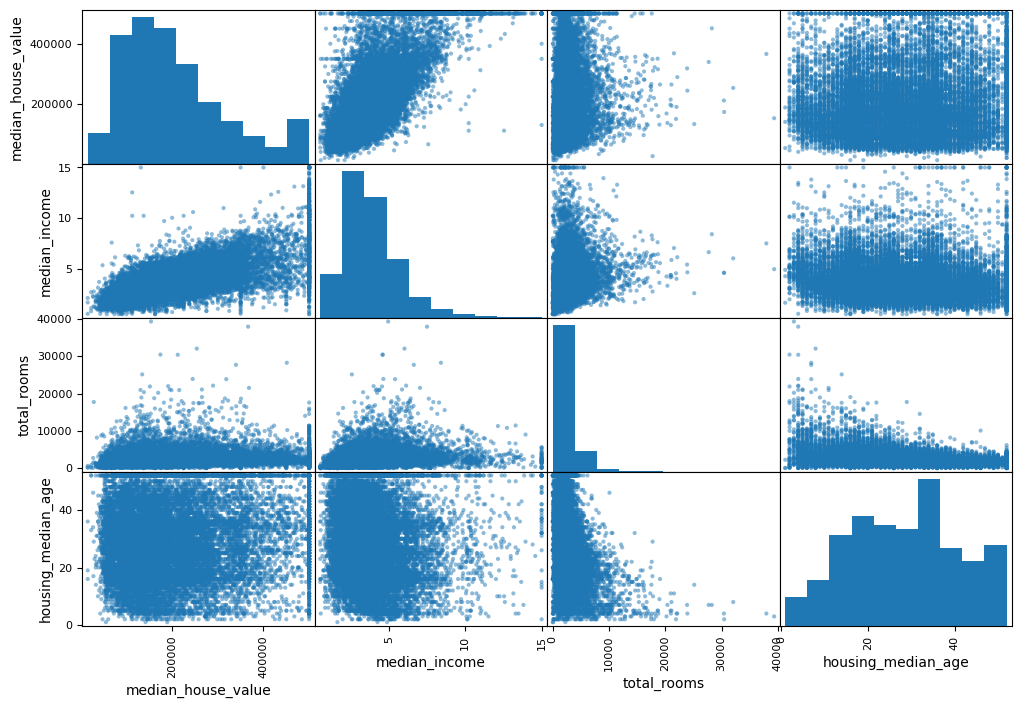

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

It looks like, the most promising attribute to predict the median house value is the median income.

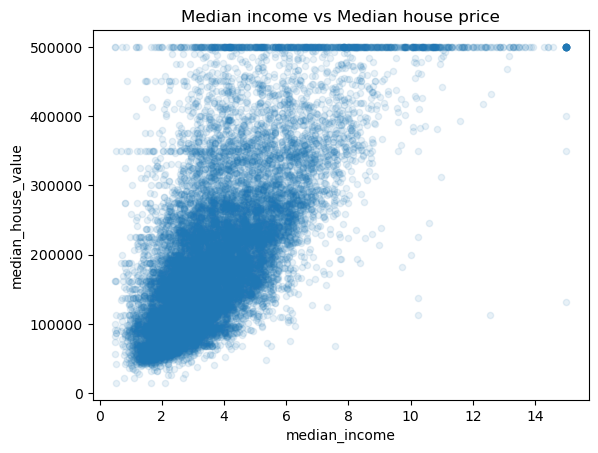

In [25]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.title('Median income vs Median house price')
plt.show()

The plot reveals a few things.<br>
- The correlation is indeed very strong, there is clearly an upward trend and the points are not too dispersed.
- The price cap that we noticed earlier is clearly visible as a horizontal line at \$500,000.
- This plot also reveals some other less obvious lines at 450,000, another around 350,000, perhaps one around 280,000 and a few more below that.

## **Experimenting with Attribute Combinations**

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

**Correlation matrix**

In [28]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

**Insights:**
- The *bedrooms_per_room* attribute is much more correlated with the median house value that the total number of room or bedrooms. Apparently houseswith lower bedroom/room ratio tend to be more expensive.
- The number or rooms per house hold is also more informative that the total number of rooms in a district. Obsviously the larger the houses, the more expensive they are.

## **Prepare the data for Machine Learning Algorithm**

We will write functions to prepare the data for our Machine Learning algorithms, for several good reasons:
1. This will allow us to reproduce these transformations easily on any dataset.(e.g., the next time we get a fresh dataset).
2. We will gradually build a library of transformation functions that we can reuse in future projects.
3. We can use these functions in our live system to transform the new data before feeding it to our algorithms.
4. This will make it possible for us to easily try various transformation and see which combination of transformations works best. 

Creating a copy of the of strat_train_set and seperating the predictors and labels.

In [29]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

### **Data Cleaning**

**options**:
- `housing.dropna(subset = [total_bedrooms])`
- `housing.drop(total_bedrooms, axis=1)`
- `median = housing['total_bedrooms'].median()`<br>
  `housing['total_bedrooms'].fillna(median, inplace = True)`

Scikit provides a handy class to take care of missing values: **SimpleImputer**.

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

Creating a copy of housing with only numerical attributes. i.e, removing ocean_proximity.

In [31]:
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [33]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Using this 'trained' imputer to transform the training set by replacing the missing values by the learned medians:

In [34]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

Converting the above NumPy array containing the transformed features into Pandas Dataframe.

In [35]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [36]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [37]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


## **Handling Text and Categorical Attributes**

In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## **Custom Transformers**

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

In [42]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [43]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transfomer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default. This hyperparameter will allow you to easily find out whether adding this attribute helps the machine learning algorithms or not. More generally, you add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate this data preparation steps, the more combinations you can automatically try out, making it much more likely that you fill a great combination (and saving you a lot of time). 

## **Feature Scaling**

With a few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.The total number of rooms ranges from about 6 to 39320, while the median income only ranges from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale:
- min-max scaling
- standardization

1. **Min-max scaling (normalization)**: Values are shifted and rescaled so that they end up ranging from 0 to 1.<br>


   - $\Large \frac{x-x_{min}}{x_{max}-x_{min}}$
      
      
   - Scikit-learn provides a transformer called `MinMaxScaler` for this. It has a feature_range hyperparameter that lets you change the range if you don't want 0-1 for some reason. 


2. **Standardization**: First it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.<br>
- $\Large \frac{x-\mu}{\sigma}$
- This maybe a problem for some algorithms (e.g., neural networks).
- However standardization is much less affected by outliers.
- Scikit-Learn provides a transformer called `StandardScaler` for standardization.
- As with all transformations, it is important to fit the scalers to the training data only, not to the full dataset. Only then can you use them to transform the training set and the test set.

## **Transformation Pipelines**

Scikit-Learn provides the `pipeline` class to help with sequences of transformations.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())
                        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

It would be more convinient to have single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20, Scikit-Learn introduced the `ColumnTransformer` for this purpose, and the good news is that it works great with Pandas DataFrame.

In [46]:
from sklearn.compose import ColumnTransformer

In [47]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [48]:
full_pipeline = ColumnTransformer([
                                 ('num', num_pipeline, num_attribs),
                                 ('cat', OneHotEncoder(), cat_attribs),
                                  ])

housing_prepared = full_pipeline.fit_transform(housing)

Note that OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. See page 74 of the text book for explanation. In this example, it returns a dense matrix.<br>
We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

## **Select and Train a Model**

Let's first train a Linear Regression model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Done! You now have a working Linear Regression model. Let's try it out on a few instances from the training set.

In [51]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [52]:
print('predictions: ', lin_reg.predict(some_data_prepared))

predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [53]:
print('labels:', list(some_labels))

labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Let's measure the regression model's RMSE on the whole training set using Scikit-Learn's `mean_squared_error` function.

In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Okay, this is better than nothing but clearly not a great score: most districts' median_housing_values range between $120000 and 265000, so a typical prediction error of 68627 is not very satisfying. This is an example of model underfitting the training data. When this happens it can mean that the features do not provide aenough information to make good predictions, or that the model is not powerful enough.<br>
Let's try `DecisionTreeRegressor`. This is a powerful model, capable of finding complex nonlinear relationships in the data.

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It is much more likely that the model has overfit the data. How can you be sure? We cannot touch the test set until we are ready to launch a model that we are confident about, so we need to use part of the training set for training, and part for model validation.

## **Better Evaluation Using Cross-Validation**

We will use Scikit-Learn's `K-fold cross-validation` feature.

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [59]:
display_scores(tree_rmse_scores)

Scores: [71722.50206665 70895.89188378 67934.07563686 71789.1310906
 69843.72783772 77334.49379339 71846.35010762 72943.83986575
 68139.25120467 71333.0735221 ]
Mean: 71378.2337009147
Standard deviation: 2517.484478422743


Now the decision Tree doesn't look as good as it did earlier. Infact  it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only as estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation)

Let's compute the same scores for the Linear Regression model just to be sure:

In [60]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


That's right: The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Let's try `RandomForestRegressor`

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [62]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse_scores = np.sqrt(forest_mse)
forest_rmse_scores

18693.05926960823

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51861.57739073 49132.03322673 46929.54185205 51783.61778686
 47185.82434811 51583.24467984 52373.25185385 49553.79677207
 48433.33856527 53685.90880525]
Mean: 50252.21352807591
Standard deviation: 2202.0387708142775


This is much better: Random forest look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it(i.e., regularize it), or get a lot more training data.

##  **Saving your models**

You can easily save your Scikit-Learn models by using Python's pickle module, or using sklearn.externals.joblib, which is more efficient at serializing large NumPy arrays:

In [64]:
import joblib

joblib.dump(lin_reg, 'models/lin_reg.pkl')

['models/lin_reg.pkl']

In [65]:
joblib.dump(tree_reg, 'models/tree_reg.pkl')

['models/tree_reg.pkl']

In [66]:
joblib.dump(forest_reg, 'models/forest_reg.pkl')

['models/forest_reg.pkl']

To reload a saved model use the below command

In [67]:
# my_model_loaded = joblib.load('models/my_model.pkl')

## **Fine-Tune Your Model**

One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

### **Grid Search**

The following code searches the best combination of hyperparameter values for the RandomForestRegressor:

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  
             ]

forest_reg  = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

All in all, the grid search will explore 12 + 6 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 x 5 = 90 rounds of training!. When its done you can get the best combination of parameters like this: 

In [69]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

You can also get the best estimator directly:

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

And ofcourse the evaluation scores are also available:

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64810.36820196961 {'max_features': 2, 'n_estimators': 3}
55843.556752183635 {'max_features': 2, 'n_estimators': 10}
52490.75873431646 {'max_features': 2, 'n_estimators': 30}
60872.07716879578 {'max_features': 4, 'n_estimators': 3}
52501.21111550128 {'max_features': 4, 'n_estimators': 10}
50587.980875788104 {'max_features': 4, 'n_estimators': 30}
59746.417556677596 {'max_features': 6, 'n_estimators': 3}
52027.94202456875 {'max_features': 6, 'n_estimators': 10}
49925.58155650116 {'max_features': 6, 'n_estimators': 30}
59192.31626665816 {'max_features': 8, 'n_estimators': 3}
51174.18933308083 {'max_features': 8, 'n_estimators': 10}
50307.429199928236 {'max_features': 8, 'n_estimators': 30}
61678.19646390141 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54444.168277668956 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59951.22458530706 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52228.21467272043 {'bootstrap': False, 'max_features': 3, 'n_estimators

In this example, we obtain the best solution by setting the max_features hyperparameter to 6, and the n_estimator hyperparameter to 30. The RMSE score for this combination is 49,925, which is slightly better than the score you got earlier using the default hyperparameter values (which was 50394).<br>
Successfully fine-tuned the best model.

###  **Randomized Search**

The grid Search approach is fine when you are exploring relatively few combinations, like in previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:<br>
1. If you let the randomized search run for, say, 1000 iterations, this approach will explore 1000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
2. You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

### **Ensemble Methods**

Another way to fine-tune your system is to try to combine the models that perform the best. The group (or 'ensemble') will often perform better than the best individual model (Just like Random Forest perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

## **Analyze the Best Models and their Errors**

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.57699787e-02, 6.80208675e-02, 4.31046131e-02, 1.78551941e-02,
       1.59174740e-02, 1.75843548e-02, 1.61780711e-02, 3.26219840e-01,
       5.75222557e-02, 1.08048476e-01, 8.45437308e-02, 1.49519424e-02,
       1.45723706e-01, 4.93371198e-05, 3.70471048e-03, 4.80544826e-03])

Let's display these important scores next to their corresponding attributes names:

In [73]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.32621984018522104, 'median_income'),
 (0.1457237056572133, 'INLAND'),
 (0.10804847617943347, 'pop_per_hhold'),
 (0.08454373077580586, 'bedrooms_per_room'),
 (0.07576997867481661, 'longitude'),
 (0.06802086748140805, 'latitude'),
 (0.05752225568093052, 'rooms_per_hhold'),
 (0.043104613116317116, 'housing_median_age'),
 (0.01785519407788596, 'total_rooms'),
 (0.01758435482903789, 'population'),
 (0.016178071098573762, 'households'),
 (0.015917474023389472, 'total_bedrooms'),
 (0.014951942354095159, '<1H OCEAN'),
 (0.004805448264549983, 'NEAR OCEAN'),
 (0.003704710481561449, 'NEAR BAY'),
 (4.933711976038838e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features.

## **Evaluate your System on the Test Set**

After tweaking the model for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.<br>
Steps
- Get the predictors and labels from the test set.
- Run you full pipeline to transform the data.
- Evaluate the final model on the test set.

In [74]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [75]:
final_rmse

48053.634008031135

We want to have an idea of how precise the estimate is.<br>
For this, we can compute a 95% confidence interval for the generalization error using `scipy.stats.t.interval()`:

In [76]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc= squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46064.82159204, 49963.3435075 ])

## **Project prelaunch phase**

We need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what our system's limitations are), document everything, and create nice presentations with clear visualizations and easy to remember statements. 

## **Launch, Monitor and Maintain your system**

- Get our model ready for production.
- Need to write monitoring code.
- Model's tend to rot as data evolves over time, unless the models are regularly trained on fresh data.
- Evaluating the system's performance will require sampling the system's predictions and evaluating them. Need to plug the human evaluation pipeline into our system.
- Evaluate the system's input data quality. Monitoring the inputs is particularly important for online learning systems.
- Train our models on a regular basis using fresh data.
- If the system is an online learning system, we should make sure that we save snapshots of its state at regular intervals so we can easily roll back to a previously working state.

# **Summary**

1. Look at the big picture
2. Select a performance measure
3. Fetch the data
4. Load the data
5. Split the data into train and test set
6. Discover and visualize the data to gain insights
7. Experiment with attribute combinations
8. Prepare the data for machine learning algorithm
    - Data cleaning
    - Handle text and categorical data
    - Transformers and custom transformers
    - Feature scaling
    - Transformation pipelines
9. Select and Train a model
10. Better evaluate using cross-validation
11. Save the models
12. Fine-Tune the models
13. Analyse the best models and their errors
14. Evaluate the system on the test set
15. Project prelaunch phase
16. Launch, monitor and maintain the system.

## **Scikit-Learn Design**

Scikit-Learn API's design principles are:
1. Consistency
    - **Estimators**: Any object that can estimate some parameter based on a dataset is called an *estimator*.The estimation is performed by the `fit()` method.
    - **Transformers**: Some estimators can also transform a dataset, these are called *transformers*. The transformation is performed by the `transform()` method with dataset as a parameter. All transformers have a convenience method called `fit_transform()`.
    - **Predictors**: Some estimators are capable of making predictions given a dataset, they are called *predictors*. It has `predict()` and `score()` methods.
2. Inspection
3. Non proliferation of classes
4. Composition
5. Sensible defaults